In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
df = df.drop(["time", "Unnamed: 0"], axis = 1)

In [3]:
#Features of our dataset
X = df[df.columns[1:]]
# Output to predict
y = df["pedestrians count"]
type(X)
X.shape

(15358, 54)

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the inputs to standardize the values
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [6]:
# compiling the neural network model
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(25, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-20 23:38:21.133953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-20 23:38:21.134389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# compiling the neural network model
# model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
#   tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(150, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(25, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(1)
# ])

In [8]:
# # compiling the neural network model
# model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=X.shape[1]),
#   tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(75, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
#   tf.keras.layers.Dense(1)
# ])

In [9]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 25)                775       
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,126
Trainable params: 13,126
Non-traina

In [10]:

# # compiling the model
# model.compile(loss=tf.keras.losses.mae,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['mae'])

# # Training the model
# model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=50, validation_split=0.2)

# compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

# Training the model
model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=50, validation_split=0.2)

Epoch 1/50


2022-11-20 23:38:21.491332: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-20 23:38:21.769283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1662.7816 - mae: 1662.7816

2022-11-20 23:38:24.432061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 3s 9ms/step - loss: 1662.7816 - mae: 1662.7816 - val_loss: 701.9003 - val_mae: 701.9003
Epoch 2/50
269/269 [==============================] - 2s 9ms/step - loss: 584.8587 - mae: 584.8587 - val_loss: 491.1733 - val_mae: 491.1733
Epoch 3/50
269/269 [==============================] - 2s 8ms/step - loss: 483.4639 - mae: 483.4639 - val_loss: 436.8114 - val_mae: 436.8114
Epoch 4/50
269/269 [==============================] - 3s 10ms/step - loss: 437.0492 - mae: 437.0492 - val_loss: 416.1997 - val_mae: 416.1997
Epoch 5/50
269/269 [==============================] - 3s 12ms/step - loss: 408.1167 - mae: 408.1167 - val_loss: 415.5750 - val_mae: 415.5750
Epoch 6/50
269/269 [==============================] - 3s 12ms/step - loss: 388.2806 - mae: 388.2806 - val_loss: 382.5289 - val_mae: 382.5289
Epoch 7/50
269/269 [==============================] - 2s 8ms/step - loss: 373.8124 - mae: 373.8124 - val_loss: 376.9852 - val_mae: 376.9852
Epoch 8/50
269/269 [======

In [11]:
ypred = model.predict(Xtest)

 48/144 [=========>....................] - ETA: 0s

2022-11-20 23:40:27.587456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 1s 3ms/step


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
#print('R score is :', r2_score(ytest, ypred))

#Old Evaluation
pred_train = model.predict(Xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train)))

ypred = model.predict(Xtest)
print(np.sqrt(mean_squared_error(ytest,ypred)))
print('R score is :', r2_score(ytest, ypred))

 68/336 [=====>........................] - ETA: 0s

2022-11-20 23:40:28.138827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


336/336 [==============================] - 1s 2ms/step
759.5325720916481
144/144 [==============================] - 0s 2ms/step
733.3620622018368
R score is : 0.9494317973464055


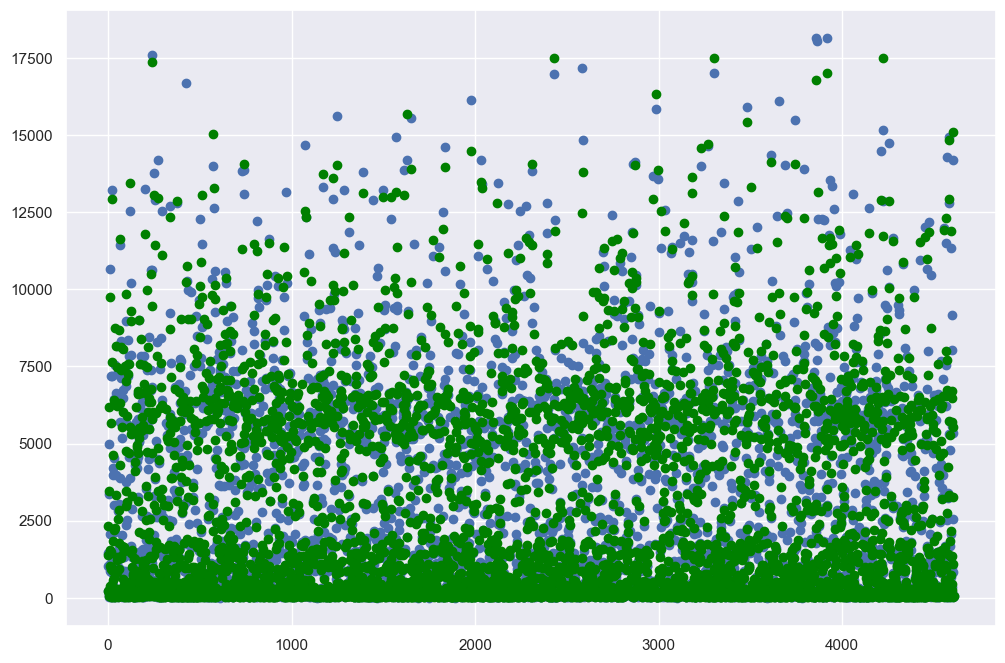

In [13]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

# ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='b')

plt.scatter(xs, ypred, color ='green')

plt.show()

In [14]:
#Find the optimal values for the NN
from tensorflow import keras
import keras_tuner as kt
